In [1]:
# coding=utf-8

import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.models import Model,load_model
from sklearn.metrics import fbeta_score,classification_report
from tensorflow.keras.layers import add,Input,Conv2D,Activation,Flatten,Dense,Dropout,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.initializers import glorot_uniform
SEED = 6666666
# if time_steps > tcn_layer.receptive_field, then we should not
# be able to solve this task.
time_steps, input_dim = 188, 1
nb_classes = 1

test_dataset = np.loadtxt('../dataset/flare28_scale_dataset_label2.csv', dtype=float, delimiter=',')
dimen = len(test_dataset[0])
x_test = test_dataset[:,0:dimen-1][:,:,np.newaxis,np.newaxis]
y_test = test_dataset[:,dimen-1][:,np.newaxis]

print("test_dataset.shape = ",test_dataset.shape)
print("x_test.shape = ",x_test.shape)
print("y_test.shape = ",y_test.shape)

model = load_model('../cpu_output/s120000r4/fcn0.8367768595041322.h5')
model.summary()

get_last_conv = tf.keras.backend.function([model.layers[0].input], [model.layers[-3].output])
last_conv = get_last_conv([x_test, 1])[0]
get_sigmoid = tf.keras.backend.function([model.layers[0].input], [model.layers[-1].output])
sigmoid = get_sigmoid(([x_test, 1]))[0]
sigmoid_weight = model.get_weights()[-2]
CAM = np.dot(last_conv, sigmoid_weight)  


test_dataset.shape =  (577, 189)
x_test.shape =  (577, 188, 1, 1)
y_test.shape =  (577, 1)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 188, 1, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 188, 1, 128)       8320      
_________________________________________________________________
batch_normalization (BatchNo (None, 188, 1, 128)       512       
_________________________________________________________________
activation (Activation)      (None, 188, 1, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 188, 1, 256)       819456    
_________________________________________________________________
batch_normalization_1 (Batch (None, 188, 1, 256)       1024      
____________________________________

In [2]:
y_pred = model.predict(x_test)

In [4]:
print(CAM)
print(CAM.shape)

[[[[   3.382058 ]]

  [[   9.431815 ]]

  [[   2.669857 ]]

  ...

  [[-203.90646  ]]

  [[-343.90164  ]]

  [[-305.82397  ]]]


 [[[ -41.617012 ]]

  [[ -46.041817 ]]

  [[ -55.547455 ]]

  ...

  [[ -22.594513 ]]

  [[ -24.91243  ]]

  [[ -21.266642 ]]]


 [[[-146.23141  ]]

  [[-263.66278  ]]

  [[-305.00278  ]]

  ...

  [[   7.973676 ]]

  [[   8.549692 ]]

  [[   4.312084 ]]]


 ...


 [[[ -14.3535595]]

  [[ -13.414942 ]]

  [[ -25.01393  ]]

  ...

  [[  -9.919389 ]]

  [[ -25.286983 ]]

  [[ -37.607986 ]]]


 [[[ -39.1395   ]]

  [[ -97.72371  ]]

  [[-112.15626  ]]

  ...

  [[-250.14944  ]]

  [[-401.47018  ]]

  [[-354.17938  ]]]


 [[[ -76.9237   ]]

  [[-161.23508  ]]

  [[-194.13321  ]]

  ...

  [[ -18.324593 ]]

  [[ -80.530785 ]]

  [[-100.805786 ]]]]
(577, 188, 1, 1)


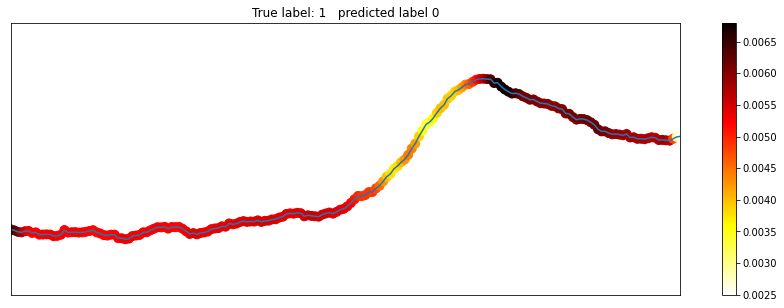

In [6]:
import matplotlib.pyplot as plt
# flarelist = [31,32,33,34,54,74,75,76,77,84,85,86,105,106,107,108,183,184,191,
#              238,239,240,241,242,307,308,368,369,370,371,383,384,385,386,445,446,447,488,489,491,492,535,536,537,556,557,558,559]
flarelist = [31]
for k in flarelist:
    CAM = (CAM - CAM.min(axis=1, keepdims=True)) / (CAM.max(axis=1, keepdims=True) - CAM.min(axis=1, keepdims=True))
    c = np.exp(CAM) / np.sum(np.exp(CAM), axis=1, keepdims=True)
    plt.figure(figsize=(15, 5));
    plt.plot(x_test[k].squeeze());
    x = np.arange(len(x_test[k]))
    y = x_test[k].squeeze()
    plt.scatter(x,y ,cmap='hot_r',c=c[k, :, :, :].squeeze(),s=80);
    plt.axis([min(x),max(x),max(y)+1,min(y)-1])
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.title('True label: 1' + '   predicted label '+ str(int(y_pred[k].round())))
    plt.savefig('../cpu_output/interpret/' + str(k) + '.png')
    plt.show()

In [7]:
print(CAM)

[[[[0.88520133]]

  [[0.90062183]]

  [[0.8833861 ]]

  ...

  [[0.35683772]]

  [[0.        ]]

  [[0.09705726]]]


 [[[0.73766994]]

  [[0.72431844]]

  [[0.69563586]]

  ...

  [[0.7950688 ]]

  [[0.7880746 ]]

  [[0.7990756 ]]]


 [[[0.43284792]]

  [[0.11270251]]

  [[0.        ]]

  ...

  [[0.8532471 ]]

  [[0.85481745]]

  [[0.84326476]]]


 ...


 [[[0.7573441 ]]

  [[0.76182187]]

  [[0.7064873 ]]

  ...

  [[0.77849793]]

  [[0.70518464]]

  [[0.6464056 ]]]


 [[[0.8278871 ]]

  [[0.6940284 ]]

  [[0.66105163]]

  ...

  [[0.34575182]]

  [[0.        ]]

  [[0.10805446]]]


 [[[0.4447245 ]]

  [[0.12482439]]

  [[0.        ]]

  ...

  [[0.6670653 ]]

  [[0.43103823]]

  [[0.3541094 ]]]]
